In [1]:
from milestone1.question4 import *
from etape2_Q3 import *
import numpy as np
from comet_ml import Experiment

In [2]:
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'

In [3]:
df2015 = create_full_df(directory2015)
df2016 = create_full_df(directory2016)
df2017 = create_full_df(directory2017)
df2018 = create_full_df(directory2018)

In [4]:
df_train = pd.concat([df2015, df2016, df2017], ignore_index=True)
df_val = df2018
# df_train = df_train.dropna(subset="Distance")
# df_val = df_val.dropna(subset="Distance")

In [5]:
X_train = df_train[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Filet_vide','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
y_train = df_train["Est_un_but"]

X_val = df_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Filet_vide','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
y_val = df_val["Est_un_but"]

#creer une dictionnaire pour transformer les events en event_id, car le model ne peut pas etre entraine sur les donnees str
dict_event_id = {'Unknown': 1, 'Faceoff': 2, 'Hit': 3,'Giveaway': 4, 'Goal': 5, 'Shot': 6,'Missed Shot': 7, 'Penalty': 8, 'Stoppage': 9,
'Sub': 10, 'Fight': 11, 'Takeaway': 12, 'Blocked Shot': 13, 'Period Start': 14,'Period End': 15, 'Game End': 16, 'Game Scheduled': 17,
'Period Ready': 18, 'Period Official': 19, 'Shootout Complete': 20 ,'Early Intermission Start': 21, 'Early Intermission End': 22, 'Game Official': 23,
'Official Challenge': 24, 'Emergency Goaltender': 25, 'Failed Shot Attempt': 26}

#triatement les nan, les nans sont changee par 0
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

#transformer les events en event_id
X_train['Last_event_type'] = X_train['Last_event_type'].apply(lambda x : dict_event_id[x])
X_val['Last_event_type'] = X_val['Last_event_type'].apply(lambda x : dict_event_id[x])




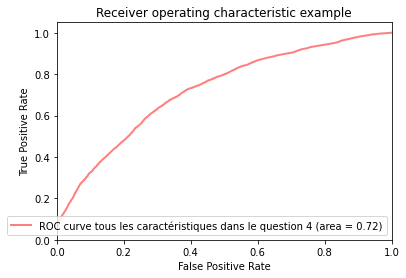

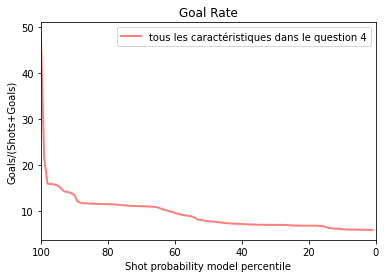

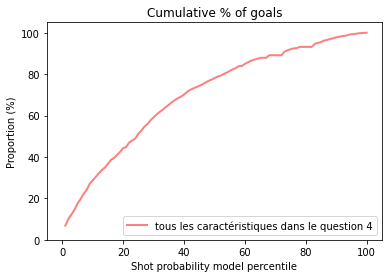

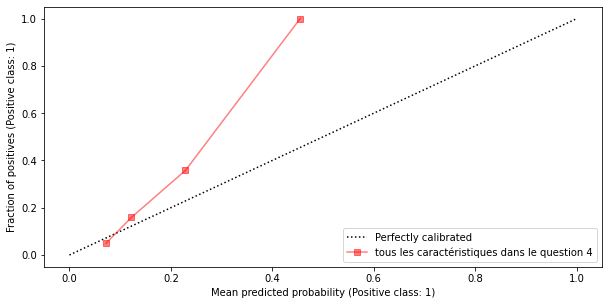

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_val)



from utils import *

create_plots(X_val, y_val, y_prob[:,1], 'tous les caractéristiques dans le question 4')

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

accuracy = clf.score(X_val, y_val)
preds = clf.predict(X_val)
print("accuracy: ",accuracy)

fpr, tpr, roc_auc = get_roc_data(y_val, y_prob[:,1])
print('roc_auc: ', roc_auc)


precision = precision_score(y_val, preds,zero_division=0)
recall  = recall_score(y_val, preds, zero_division=0)

print('precision: ',precision)
print('recall: ',recall)

accuracy:  0.9034430392352121
roc_auc:  0.7220112189816973
precision:  0.0
recall:  0.0


In [17]:
exp = Experiment(api_key='57KbI0mTaIGplsSaYoAFXYMFL', project_name='ift-6758-a22', workspace='teylouniseifu' )
exp.log_metric("accuracy", accuracy)
exp.log_metric("roc_auc", roc_auc)
exp.log_metric("precision", precision)



COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/hanrui/comet-examples-quickstart/50ffd6581d54405ea11a9c246f650208
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.9034430392352121
COMET INFO:     precision : 0.0
COMET INFO:     roc_auc   : 0.7220112189816973
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (724 bytes)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COM

In [18]:
exp.log_model("ramdom forest", "/Users/hrh/Desktop/programmeFile/dataSicence/projet/milestone-2-main/ift-6758-a22/q_6_model_Hanrui.ipynb")

{'web': 'https://www.comet.com/api/asset/download?assetId=2be0ee892a9d415ebcad1770c5374f8e&experimentKey=7ced5a0234f34a449b212760baa5ff45',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=2be0ee892a9d415ebcad1770c5374f8e&experimentKey=7ced5a0234f34a449b212760baa5ff45',
 'assetId': '2be0ee892a9d415ebcad1770c5374f8e'}

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# y_prob = clf.predict_proba(X_val)
# score = clf.score(X_val, y_val)
# print("accuracy: ",score)

# from utils import *
# fpr, tpr, roc_auc = get_roc_data(y_val, y_prob[:,1])
# print(roc_auc)
# tpr_mean = tpr.mean()
# fpr_mean = fpr.mean()
# print(tpr_mean)
# print(fpr_mean)
# create_plots(X_val, y_val, y_prob[:,1], 'tous les caractéristiques dans le question 4')